<a href="https://colab.research.google.com/github/Shd289301/Data_science_projects/blob/main/Customer_Behavoiur_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#loading dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Spltting dataset into independent and dependent features
X = dataset.iloc[:,3:-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y = dataset.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Feature Engineering
Geography = pd.get_dummies(dataset['Geography'],drop_first=True)
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
Gender = pd.get_dummies(dataset['Gender'],drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,Geography,Gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Splitting dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = pd.DataFrame(SS.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(SS.transform(X_test),columns=X_test.columns)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687


In [ ]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1.754865,-0.573694,-1.091687
1,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,-0.569844,-0.573694,-1.091687
2,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,-0.569844,1.743090,-1.091687
3,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,-0.569844,-0.573694,0.916013
4,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1.754865,-0.573694,0.916013


In [ ]:
#Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#initialize ANN
classifier = Sequential()

In [ ]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
#adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [ ]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4754 - accuracy: 0.7959 - val_loss: 0.4399 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4397 - accuracy: 0.7962 - val_loss: 0.4207 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4226 - accuracy: 0.7962 - val_loss: 0.4178 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4081 - accuracy: 0.7962 - val_loss: 0.3985 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4054 - accuracy: 0.7962 - val_loss: 0.4097 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4064 - accuracy: 0.8005 - val_loss: 0.3975 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4096 - accuracy: 0.8044 - val_loss: 0.4089 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

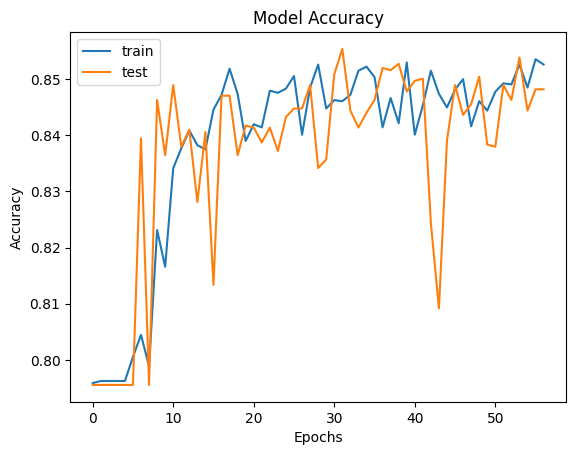

In [ ]:
#Summarizing history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

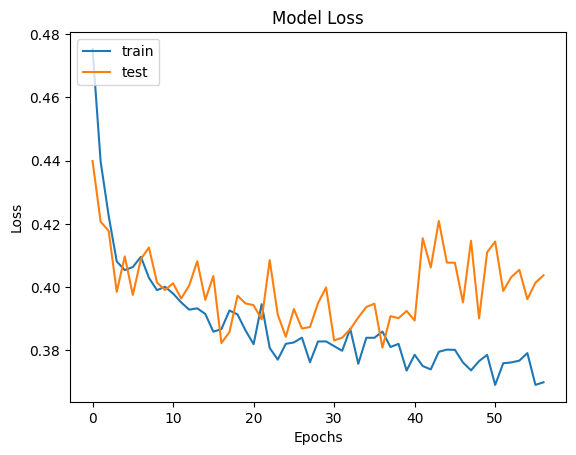

In [ ]:
#Summarizing history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#Weights of the ANN
classifier.get_weights()

[array([[ 1.20460270e-02,  1.04847975e-01, -1.68644860e-01,
          5.19813895e-01, -9.71008539e-02, -4.91593063e-01,
         -1.06243193e+00,  2.62616009e-01, -9.27495062e-01,
         -1.70251989e+00, -6.77612841e-01],
        [ 2.85901070e+00, -1.56924510e+00, -1.85283113e+00,
         -1.35914803e+00,  2.55353785e+00, -1.12096691e+00,
         -3.02452183e+00, -3.95883012e+00, -1.73974574e+00,
         -1.18925893e+00,  1.10354173e+00],
        [-9.42346036e-01,  1.24631882e+00, -3.62230957e-01,
         -1.33640617e-01,  3.33339721e-01, -1.47118121e-01,
         -1.11463928e+00, -1.24779016e-01,  3.48770261e-01,
          2.45765448e-01,  5.75815022e-01],
        [ 2.53025246e+00, -2.70606756e+00, -1.12125850e+00,
         -1.74286616e+00, -4.80053008e-01,  2.90885776e-01,
          3.98553133e-01,  8.52171853e-02, -3.06285977e-01,
         -7.70469666e-01, -3.55564332e+00],
        [-3.69032860e-01, -2.21843421e-01,  3.03693920e-01,
          3.78443390e-01, -2.96199501e-01,  

In [ ]:
#Prediction with model
Y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
Y_pred = np.array(list(map(lambda x: 1 if x == True else 0,(Y_pred >= 0.5))))

In [ ]:
#Evaluation of model
from sklearn.metrics import confusion_matrix, accuracy_score
#confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[1445,  150],
       [ 149,  256]])

<Axes: >

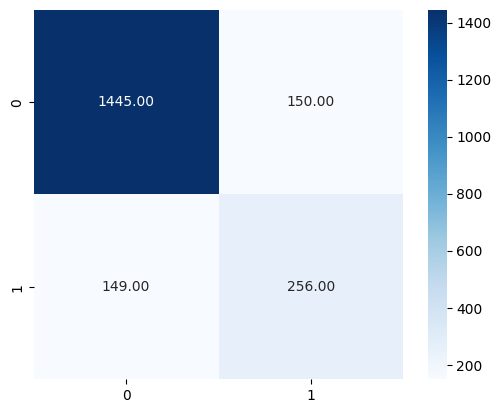

In [ ]:
#visualisation of confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,square=True,fmt='.2f',cmap='Blues')

In [ ]:
#accuracy score
acc_score = accuracy_score(Y_test,Y_pred)
acc_score

0.8505

In [ ]:
#classification report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1595
           1       0.63      0.63      0.63       405

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000

